In [4]:
data<- read.csv("PFC_22genes_AllBehav.csv", header= TRUE, row.names=1)

In [5]:
head(data)

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,2651,1275,1695,1338.00,2269,1993.0,2631,263,492.43,Beta
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,3080,800,2901,1768.00,2336,1536.0,1417,43,712.38,Beta
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,2570,1412,1436,588.80,2045,1868.0,344,956,360.00,Beta
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3420,803,2327,570.60,2821,1808.0,551,2203,148.38,Beta
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,2713,2490,1729,1334.00,2701,-12.3,444,780,141.50,Control
Control2_F1,3802,777,1052,41,572,89,285,963,121,3407,...,1719,1160,1590,65.25,2598,1192.0,292,1091,190.50,Control


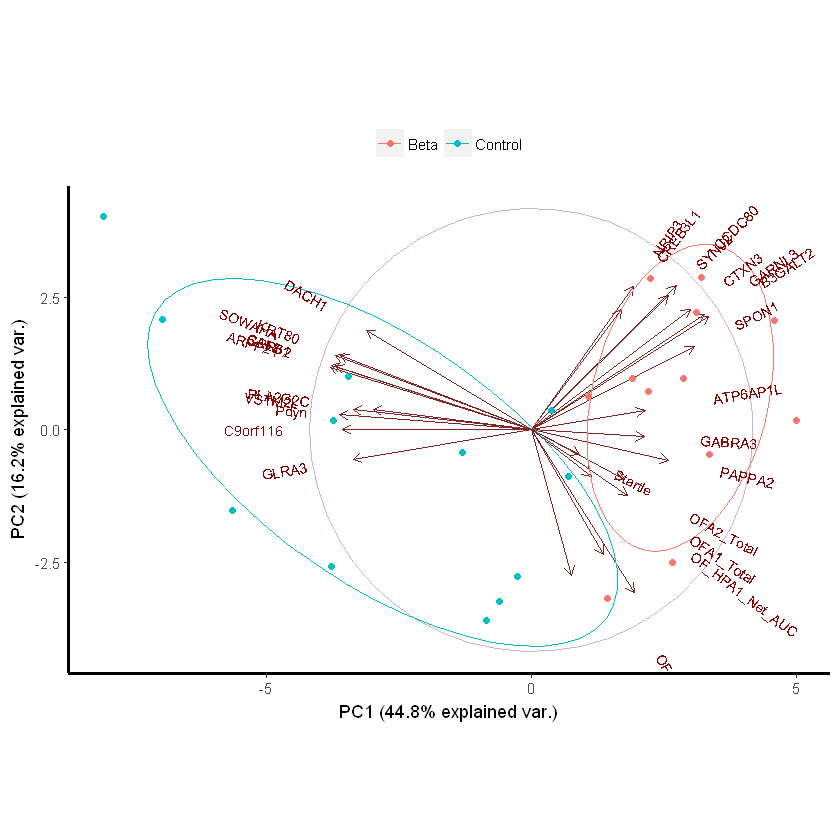

In [128]:
n=ncol(data)

data_21<-data [,1:(n-1)]
Group21<- data[,n]

pca2<-prcomp(data_21,
                center = TRUE,
                 scale. = TRUE)

library(ggbiplot)
library(plotly)
b <- ggbiplot(pca2, obs.scale = 1, var.scale = 1, 
               groups= Group21, ellipse = TRUE,varname.size = 3, varname.adjust = 3, 
              circle = TRUE)
b <- b + scale_color_discrete(name = '')
b <- b + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               panel.background= element_rect(fill = 'white'),
               axis.line = element_line(colour = "black", size = 1))
b
## here we are ploting PCA on a circle of correlations to visualize the relationship between gene expression and behaviors

In [112]:
datah<-(t(data[,1:29]))
head(datah)

,Beta1_F1,Beta2_F1,Beta3_F1,Beta4_F1,Control1_F1,Control2_F1,Control3_F1,Control4_F1,Beta1_F2,Beta2_F2,...,Control3_F2,Control4_F2,Beta1_F3,Beta2_F3,Beta3_F3,Beta4_F3,Control1_F3,Control2_F3,Control3_F3,Control4_F3
ARPP21,3430,3193,4427,3836,9818,3802,5880,8455,3505,3005,...,3737,4255,3714,4842,2968,3752,4125,8464,8318,6903
ATP6AP1L,1607,1683,2056,2555,1733,777,764,944,2110,1667,...,2169,1991,2077,1961,2090,1422,1398,1265,1532,1050
B3GALT2,2086,1751,1261,1753,935,1052,848,783,2129,1099,...,1004,933,1706,2071,1788,1718,1408,773,1293,778
C9orf116,30,32,14,30,95,41,54,86,26,37,...,54,49,48,31,26,25,71,67,43,83
CALB1,497,489,364,520,2647,572,1008,1868,272,399,...,634,653,322,485,321,280,432,1503,1429,879
CCDC80,260,136,125,247,120,89,70,82,259,81,...,57,64,160,219,164,149,167,77,100,90


Warning message:
"package 'gplots' was built under R version 3.2.5"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



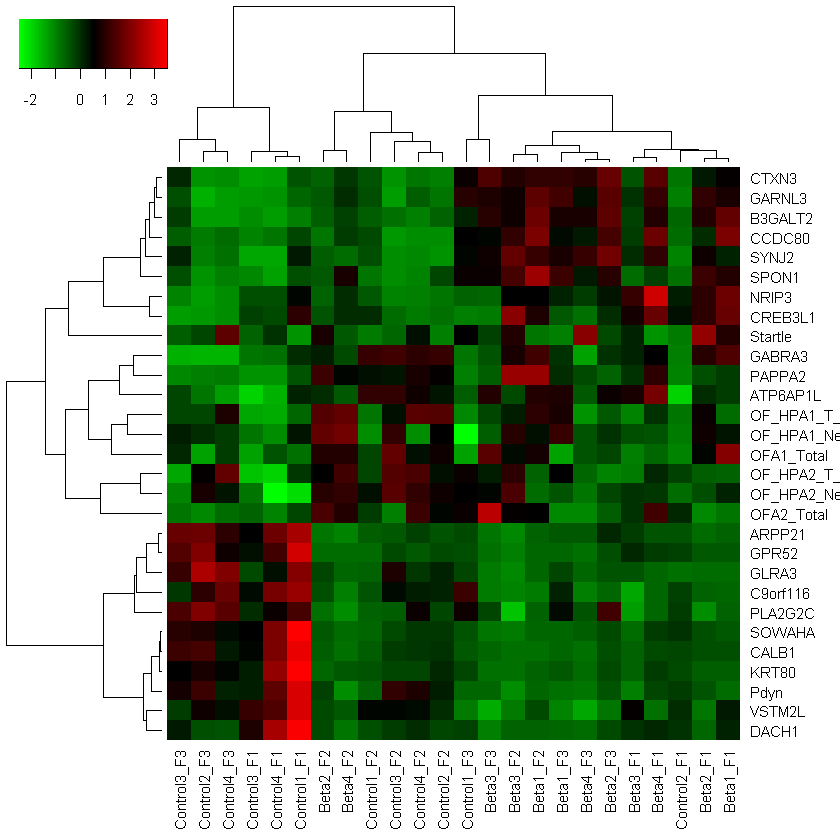

In [113]:
library(heatmap3)
library(ggplot2)
library(gplots)
heatmap3(datah, Rowv = NULL, Colv = NULL,
  distfun = function(x) as.dist(1 - cor(t(x), use = "pa")),
  balanceColor = F,showColDendro = T,
  showRowDendro = T, col = greenred(105), legendfun, method = "complete", ColAxisColors = 0,
  RowAxisColors = 7, hclustfun = hclust, reorderfun = function(d, w)
  reorder(d, w), add.expr, symm = FALSE,
  scale = "row", na.rm = TRUE, 
  ColSideWidth = 0.4, 
  file = "heatmap3.pdf", topN = NA, filterFun = sd, margins = c(5, 5), lasRow = 2, lasCol = 2,
  labRow =colnames(data), labCol = NULL , main = NULL, xlab = NULL, ylab = NULL,
  keep.dendro = FALSE, verbose = getOption("verbose"))
      
## This is a heatmap with hierarchical clustering of both the treatment groups as well as the genes and behaviors

In [15]:
## Since Beta2_F2, Beta4_F2 and Control2_F1 don't fall with their proper treatment groups, we eliminate these samples 
## for the purposes of building a model
datah<-(t(data[,1:29]))
Group<- data[,30]
head(datah)

,Beta1_F1,Beta2_F1,Beta3_F1,Beta4_F1,Control1_F1,Control2_F1,Control3_F1,Control4_F1,Beta1_F2,Beta2_F2,...,Control3_F2,Control4_F2,Beta1_F3,Beta2_F3,Beta3_F3,Beta4_F3,Control1_F3,Control2_F3,Control3_F3,Control4_F3
ARPP21,3430,3193,4427,3836,9818,3802,5880,8455,3505,3005,...,3737,4255,3714,4842,2968,3752,4125,8464,8318,6903
ATP6AP1L,1607,1683,2056,2555,1733,777,764,944,2110,1667,...,2169,1991,2077,1961,2090,1422,1398,1265,1532,1050
B3GALT2,2086,1751,1261,1753,935,1052,848,783,2129,1099,...,1004,933,1706,2071,1788,1718,1408,773,1293,778
C9orf116,30,32,14,30,95,41,54,86,26,37,...,54,49,48,31,26,25,71,67,43,83
CALB1,497,489,364,520,2647,572,1008,1868,272,399,...,634,653,322,485,321,280,432,1503,1429,879
CCDC80,260,136,125,247,120,89,70,82,259,81,...,57,64,160,219,164,149,167,77,100,90


In [12]:
datah<-as.data.frame(datah)
data_orm <- within(datah, rm(Beta2_F2,Beta4_F2,Control2_F1))
head(data_orm)

data_ormt<- as.data.frame(t(data_orm))

,Beta1_F1,Beta2_F1,Beta3_F1,Beta4_F1,Control1_F1,Control3_F1,Control4_F1,Beta1_F2,Beta3_F2,Control1_F2,...,Control3_F2,Control4_F2,Beta1_F3,Beta2_F3,Beta3_F3,Beta4_F3,Control1_F3,Control2_F3,Control3_F3,Control4_F3
ARPP21,3430,3193,4427,3836,9818,5880,8455,3505,2481,3632,...,3737,4255,3714,4842,2968,3752,4125,8464,8318,6903
ATP6AP1L,1607,1683,2056,2555,1733,764,944,2110,1515,2185,...,2169,1991,2077,1961,2090,1422,1398,1265,1532,1050
B3GALT2,2086,1751,1261,1753,935,848,783,2129,1662,1105,...,1004,933,1706,2071,1788,1718,1408,773,1293,778
C9orf116,30,32,14,30,95,54,86,26,23,35,...,54,49,48,31,26,25,71,67,43,83
CALB1,497,489,364,520,2647,1008,1868,272,258,390,...,634,653,322,485,321,280,432,1503,1429,879
CCDC80,260,136,125,247,120,70,82,259,203,113,...,57,64,160,219,164,149,167,77,100,90


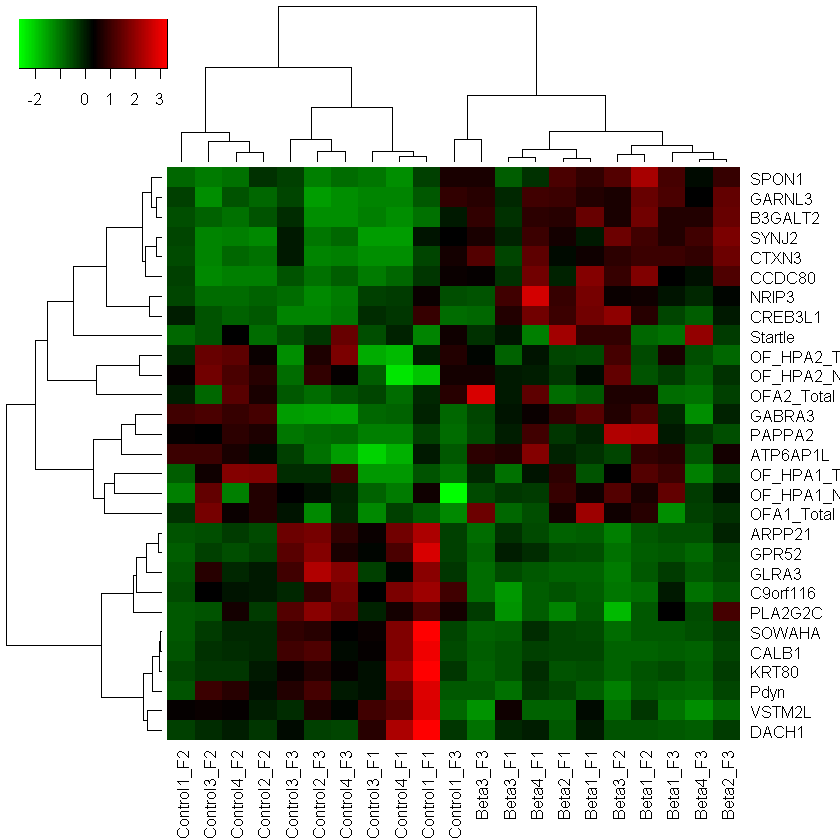

In [115]:
## This is a heatmap of how the treatment groups separate over the 3 generations once previous outliers have been revmoved. 
## of note, F2 controls see distinct from F1 and F3 control samples
library(heatmap3)
library(ggplot2)
library(gplots)
heatmap3(data_orm, Rowv = NULL, Colv = NULL,
  distfun = function(x) as.dist(1 - cor(t(x), use = "pa")),
  balanceColor = F,showColDendro = T,
  showRowDendro = T, col = greenred(105), legendfun, method = "complete", ColAxisColors = 0,
  RowAxisColors = 7, hclustfun = hclust, reorderfun = function(d, w)
  reorder(d, w), add.expr, symm = FALSE,
  scale = "row", na.rm = TRUE, 
  ColSideWidth = 0.4, 
  file = "heatmap3.pdf", topN = NA, filterFun = sd, margins = c(5, 5), lasRow = 2, lasCol = 2,
  labRow =colnames(data), labCol = NULL , main = NULL, xlab = NULL, ylab = NULL,
  keep.dendro = FALSE, verbose = getOption("verbose"))

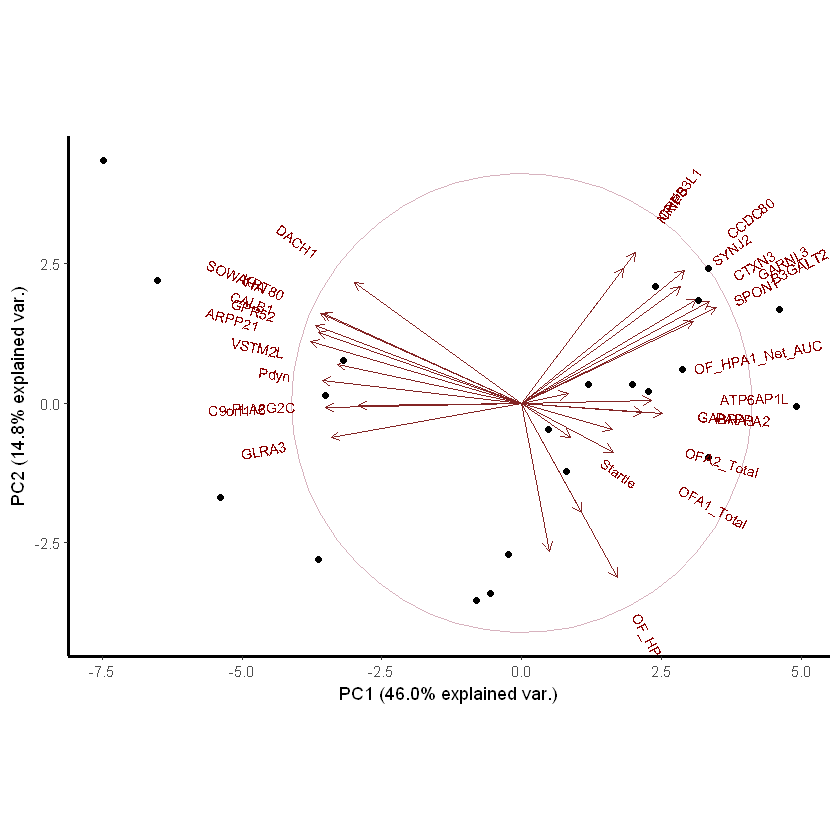

In [132]:
pca2<-prcomp(data_ormt,
                center = TRUE,
                 scale. = TRUE)

library(ggbiplot)
library(plotly)
b <- ggbiplot(pca2, obs.scale = 1, var.scale = 1, ellipse = TRUE,varname.size = 3, varname.adjust = 3, 
              circle = TRUE)
b <- b + scale_color_discrete(name = '')
b <- b + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               axis.line = element_line(colour = "black", size = 1),
               panel.background= element_rect(fill = 'white'))
b

In [142]:
model2 = lm(OFA1_Total ~ B3GALT2+GARNL3+GABRA3+NRIP3, data= data_ormt)
summary(model2)
### This model works on my data when the outliers are removed


Call:
lm(formula = OFA1_Total ~ B3GALT2 + GARNL3 + GABRA3 + NRIP3, 
    data = data_ormt)

Residuals:
    Min      1Q  Median      3Q     Max 
-570.92 -387.50   89.72  251.76  935.97 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  79.49563  483.29818   0.164 0.871409    
B3GALT2       2.88441    0.64252   4.489 0.000372 ***
GARNL3       -2.86516    0.75688  -3.785 0.001622 ** 
GABRA3        0.30278    0.07789   3.887 0.001309 ** 
NRIP3        -0.05450    0.02699  -2.019 0.060562 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 455.4 on 16 degrees of freedom
Multiple R-squared:  0.7225,	Adjusted R-squared:  0.6531 
F-statistic: 10.41 on 4 and 16 DF,  p-value: 0.0002384


In [53]:
F1 = data[1:8,]
modelF1 = lm(OFA1_Total ~ NRIP3+B3GALT2+GARNL3+GABRA3, data= F1)
summary(modelF1)
### This model works on F1 data


Call:
lm(formula = OFA1_Total ~ NRIP3 + B3GALT2 + GARNL3 + GABRA3, 
    data = F1)

Residuals:
   Beta1_F1    Beta2_F1    Beta3_F1    Beta4_F1 Control1_F1 Control2_F1 
      69.67      -21.12     -261.41       90.16      -16.22      -36.61 
Control3_F1 Control4_F1 
    -315.69      491.22 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.028e+03  7.432e+02  -1.383    0.261
NRIP3       -6.606e-02  6.158e-02  -1.073    0.362
B3GALT2      2.288e+00  9.789e-01   2.338    0.101
GARNL3      -2.264e+00  1.470e+00  -1.540    0.221
GABRA3       5.601e-01  3.361e-01   1.666    0.194

Residual standard error: 376.1 on 3 degrees of freedom
Multiple R-squared:  0.9148,	Adjusted R-squared:  0.8011 
F-statistic: 8.049 on 4 and 3 DF,  p-value: 0.05903


In [54]:
F3 = data[17:24,]
modelF3 = lm(OFA1_Total ~ NRIP3+B3GALT2+GARNL3+GABRA3, data= F3)
summary(modelF3)
### This model works on F3 data, not significant but strong R2


Call:
lm(formula = OFA1_Total ~ NRIP3 + B3GALT2 + GARNL3 + GABRA3, 
    data = F3)

Residuals:
   Beta1_F3    Beta2_F3    Beta3_F3    Beta4_F3 Control1_F3 Control2_F3 
    -54.437     -40.521     226.399       8.907    -129.348    -620.898 
Control3_F3 Control4_F3 
   -108.231     718.130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -512.8199   953.5036  -0.538   0.6280  
NRIP3         -0.3975     0.1777  -2.236   0.1113  
B3GALT2        3.7558     1.3968   2.689   0.0745 .
GARNL3        -2.0318     1.8023  -1.127   0.3416  
GABRA3         0.3390     0.5321   0.637   0.5694  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 573.2 on 3 degrees of freedom
Multiple R-squared:  0.7456,	Adjusted R-squared:  0.4063 
F-statistic: 2.198 on 4 and 3 DF,  p-value: 0.2719


In [74]:
F2 = data[9:16,]
modelF2 = lm(OFA1_Total ~ NRIP3+B3GALT2+GARNL3+GABRA3, data= F2)
summary(modelF2)
### This model works on F2 data, with outliers not removed. Not significant but strong R2


Call:
lm(formula = OFA1_Total ~ NRIP3 + B3GALT2 + GARNL3 + GABRA3, 
    data = F2)

Residuals:
   Beta1_F2    Beta2_F2    Beta3_F2    Beta4_F2 Control1_F2 Control2_F2 
      22.32     -155.63       44.84       87.43     -240.79     -224.97 
Control3_F2 Control4_F2 
     207.25      259.56 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 4613.9563  1140.8523   4.044   0.0272 *
NRIP3         -0.1523     0.1348  -1.129   0.3409  
B3GALT2        3.6908     1.1459   3.221   0.0486 *
GARNL3        -3.2507     1.2524  -2.595   0.0807 .
GABRA3        -0.4181     0.1948  -2.146   0.1211  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 290.6 on 3 degrees of freedom
Multiple R-squared:  0.7975,	Adjusted R-squared:  0.5275 
F-statistic: 2.954 on 4 and 3 DF,  p-value: 0.2001


In [64]:
head(data)

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,2651,1275,1695,1338.00,2269,1993.0,2631,263,492.43,Beta
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,3080,800,2901,1768.00,2336,1536.0,1417,43,712.38,Beta
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,2570,1412,1436,588.80,2045,1868.0,344,956,360.00,Beta
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3420,803,2327,570.60,2821,1808.0,551,2203,148.38,Beta
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,2713,2490,1729,1334.00,2701,-12.3,444,780,141.50,Control
Control2_F1,3802,777,1052,41,572,89,285,963,121,3407,...,1719,1160,1590,65.25,2598,1192.0,292,1091,190.50,Control


In [72]:
model_Data = lm(OFA1_Total ~ NRIP3+B3GALT2+GARNL3+GABRA3, data= data)
summary(model_Data)
## Model still fits when outliers are not removed


Call:
lm(formula = OFA1_Total ~ NRIP3 + B3GALT2 + GARNL3 + GABRA3, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-693.63 -372.23   -6.32  237.60 1107.91 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  33.81458  520.35289   0.065  0.94887   
NRIP3        -0.06020    0.03005  -2.003  0.05966 . 
B3GALT2       2.57816    0.72789   3.542  0.00218 **
GARNL3       -2.49861    0.84653  -2.952  0.00819 **
GABRA3        0.31630    0.08678   3.645  0.00172 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 523.8 on 19 degrees of freedom
Multiple R-squared:  0.6155,	Adjusted R-squared:  0.5346 
F-statistic: 7.604 on 4 and 19 DF,  p-value: 0.0007797


In [76]:
input= read.csv("PFC_model_wCV.csv", header=TRUE, row.names=1)
head(input)

,NRIP3,B3GALT2,GARNL3,GABRA3,OFA1_Total,Predicted,Predicted_CV
Beta1_F1,16732,2086,1683,6661,2631,2306.3325,2034.5854
Beta2_F1,13215,1751,1792,6050,1417,1188.7558,1155.6994
Beta3_F1,13871,1261,1366,4921,344,593.2761,640.0243
Beta4_F1,22119,1753,1813,5432,551,409.9727,279.3251
Control1_F1,10578,935,1140,4692,444,443.2793,443.1394
Control2_F1,9190,1052,1039,3407,292,674.3953,746.7024


In [78]:
model_predicted = lm(Predicted ~ OFA1_Total, data=input)
summary(model_predicted)


Call:
lm(formula = Predicted ~ OFA1_Total, data = input)

Residuals:
    Min      1Q  Median      3Q     Max 
-827.30 -331.07   40.08  291.93  517.06 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 398.0186   132.6848   3.000   0.0066 ** 
OFA1_Total    0.6155     0.1037   5.935 5.68e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 381.9 on 22 degrees of freedom
Multiple R-squared:  0.6155,	Adjusted R-squared:  0.598 
F-statistic: 35.22 on 1 and 22 DF,  p-value: 5.678e-06


In [79]:
## Model After LOO Cross Validation
model_predictedCV = lm(Predicted_CV ~ OFA1_Total, data=input)
summary(model_predictedCV)


Call:
lm(formula = Predicted_CV ~ OFA1_Total, data = input)

Residuals:
    Min      1Q  Median      3Q     Max 
-830.36 -350.17   33.37  352.51  651.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.4543   155.7081   3.176 0.004377 ** 
OFA1_Total    0.5216     0.1217   4.285 0.000301 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 448.2 on 22 degrees of freedom
Multiple R-squared:  0.455,	Adjusted R-squared:  0.4302 
F-statistic: 18.36 on 1 and 22 DF,  p-value: 0.0003005


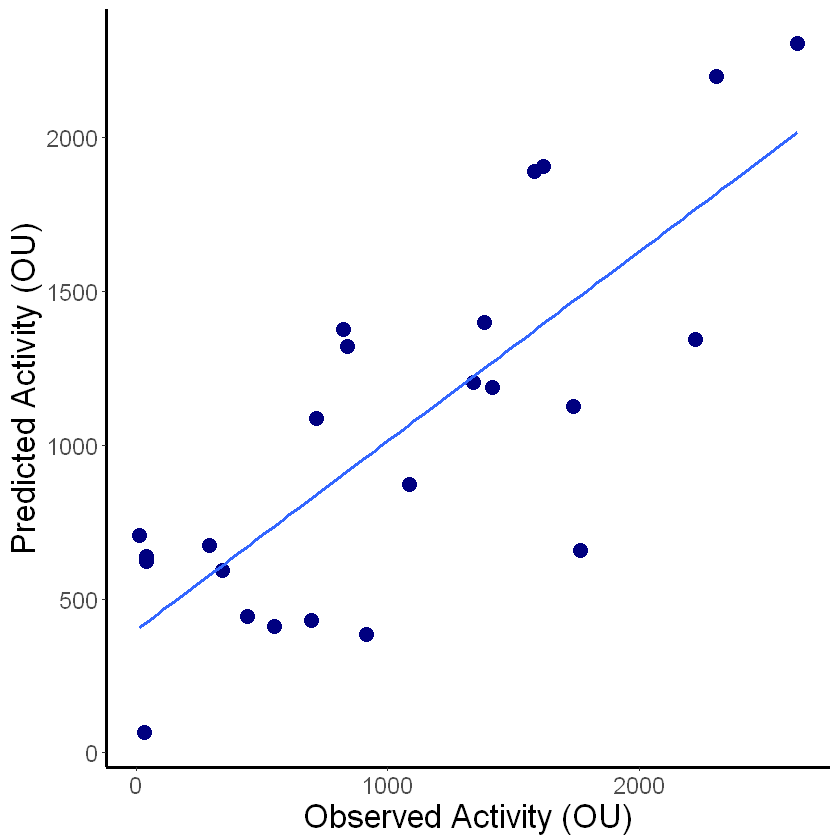

In [109]:
## Model Without Cross Validation
p<- ggplot(input,aes(OFA1_Total,Predicted)) +
    geom_point(size=4, color = 'navy') +
    labs(
        x= "Observed Activity (OU)",
        y= "Predicted Activity (OU)"
        ) +
    geom_smooth(method = 'lm', se=FALSE)
p + theme(
        axis.line = element_line(colour = "black", size = 1),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size=20),
        axis.text = element_text(size=14),
        panel.background= element_rect(fill = 'white')) 

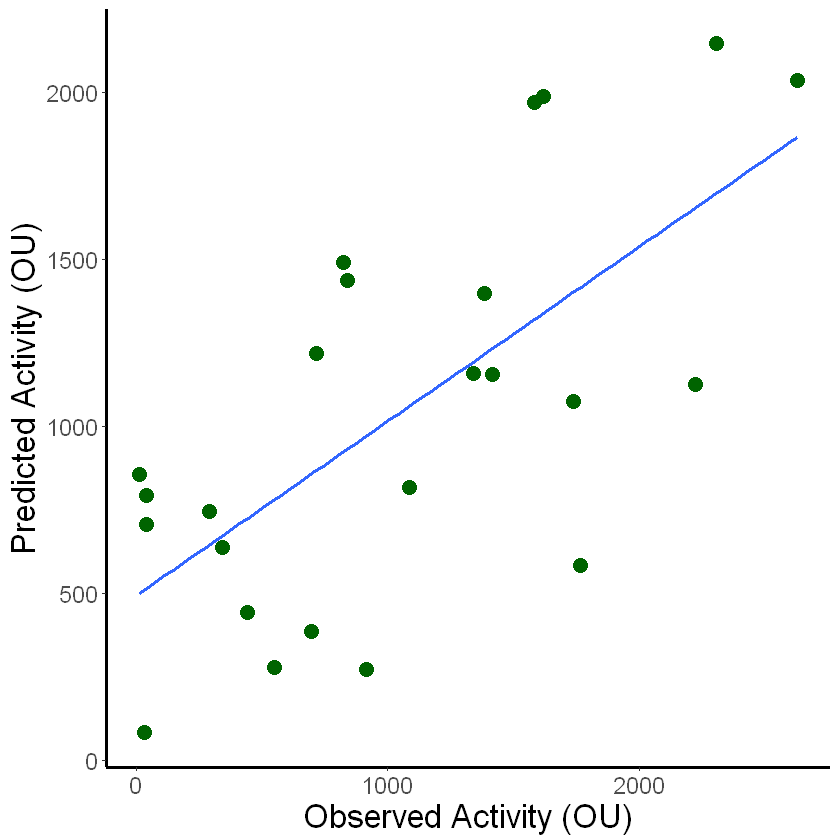

In [110]:
## Model with LOO Cross Validation
p<- ggplot(input,aes(OFA1_Total,Predicted_CV)) +
    geom_point(size=4, color = 'darkgreen') +
    labs(
        x= "Observed Activity (OU)",
        y= "Predicted Activity (OU)"
        ) +
    geom_smooth(method = 'lm', se=FALSE)
p + theme(
        axis.line = element_line(colour = "black", size = 1),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size=20),
        axis.text = element_text(size=14),
        panel.background= element_rect(fill = 'white')) 

In [2]:
allval =read.csv("data/Allgen_qPCRVal.csv", header =TRUE, row.name=1)
av = subset(allval, Gen == 'F1' | Gen == 'F3', select= Target:Datatype)
seq = av[ which (av$Datatype == 'seq'),]
test = av[ which (av$Datatype == 'test'),]

In [3]:
dataseq = seq[,7:11]
dataseqt = t(dataseq)
dataseqt

,Beta1 F3,Beta3 F3,Beta4 F3,Beta5 F3,Beta1 F1,Beta2 F1,Beta3 F1,Beta4 F1,Control1 F3,Control2 F3,Control4 F3,Control7 F3,Control2 F1,Control3 F1,Control4 F1
OFA1_Total,586.97000,8.48000,702.87000,2284.43000,493.90000,1437.94000,351.72000,2773.18000,1170.24000,26.75000,15.07000,924.67000,691.08000,26.97000,393.65000
GARNL3_Cq,30.58336,30.42814,29.75806,30.22687,32.03000,31.89000,31.67000,31.26000,30.69184,30.20273,30.38427,30.88156,32.68000,32.56000,32.30000
GABRA3_Cq,24.65560,24.37964,24.22730,24.92885,25.26899,25.41201,25.09146,24.34343,25.51952,23.42095,24.14016,26.84222,25.69683,26.30257,25.91268
NRIP3_Cq,25.15297,24.97056,24.65992,25.86597,26.33381,26.64076,26.42335,25.85084,26.45120,26.40640,25.48902,27.13822,27.18053,29.24712,27.23662
B3GALT2_Cq,25.14000,24.40000,24.36000,24.98000,25.07000,25.10000,24.94000,24.04000,25.08000,24.46000,24.70000,25.09000,25.62000,26.71000,25.90000


In [4]:
colnames(dataseqt)

[1] "Beta1 F3"    "Beta3 F3"    "Beta4 F3"    "Beta5 F3"    "Beta1 F1"   
 [6] "Beta2 F1"    "Beta3 F1"    "Beta4 F1"    "Control1 F3" "Control2 F3"
[11] "Control4 F3" "Control7 F3" "Control2 F1" "Control3 F1" "Control4 F1"

Warning message in validityMethod(object):
"'counts' contains non-integer numbers"Warning message in RUVr(counts, cIdx, k, residuals, center, round, epsilon, tolerance, :
"It seems the count matrix is already log transformed.
Skipping log transformation.
If not, please fix the matrix.
The count matrix should contain only positive numbers."Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

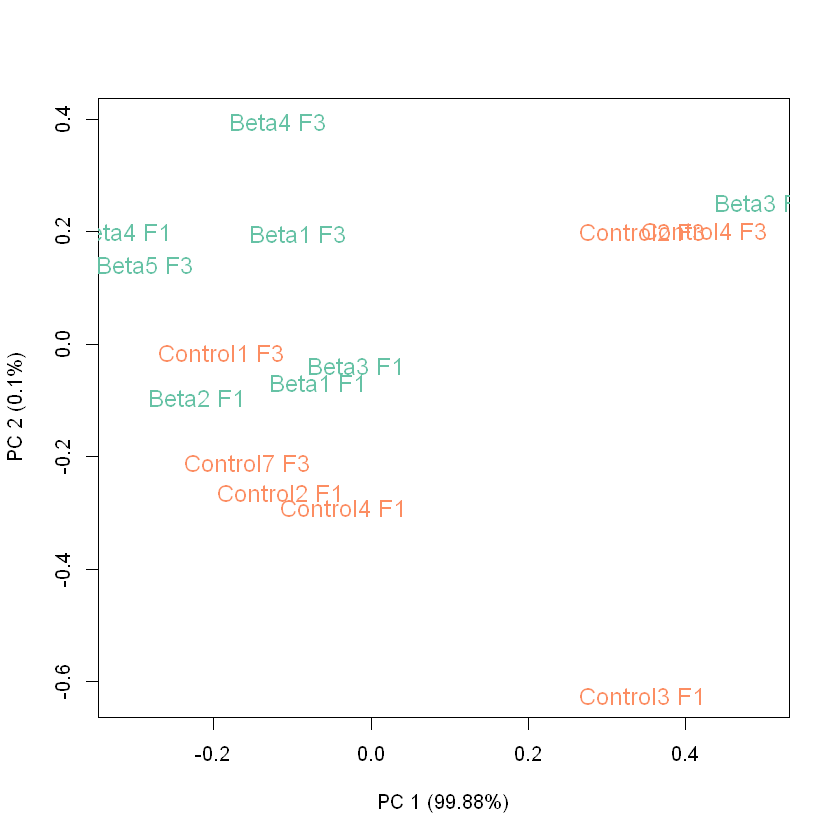

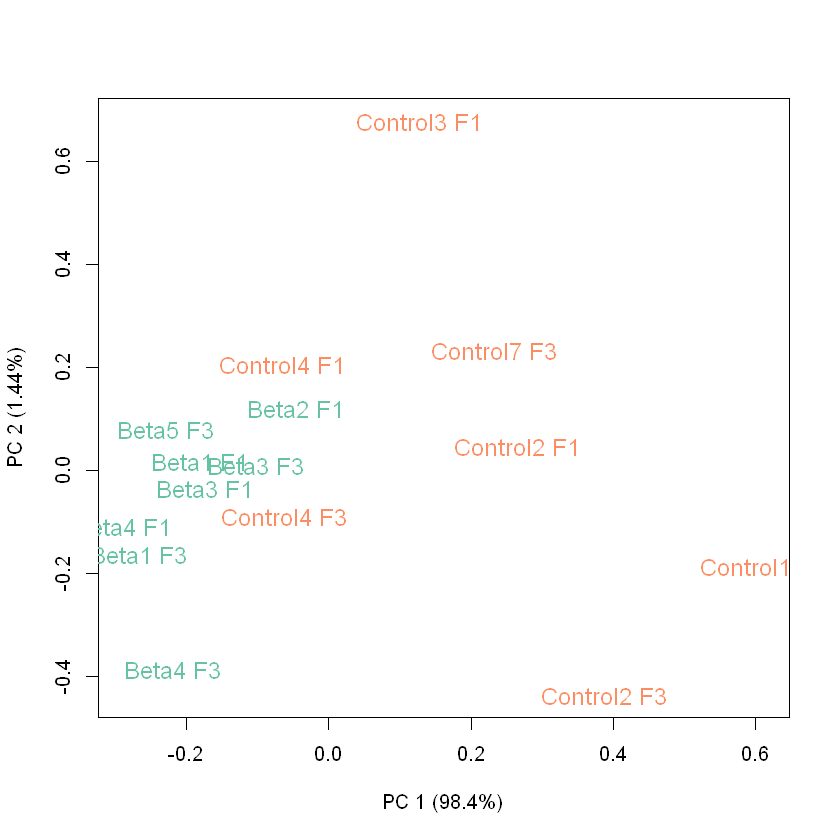

In [6]:
## RUVseq is a package that allows for the removal of unwanted variance
## in a data set. It was originally designed for RNAsequencing data, however
## it can be applied to other forms of data as well. 
## RUVseq works by regressing the data on both the known covariates of interest
## and the unknown factors of unwanted variation using the following equation:

## log E[Y |W, X, O] = W α + Xβ + O

## Here, Y is our expression data, X is our source of 'wanted variation' stemming
## from treatment effect, and W, α, k, and β are unknown parameters. For a given
## k, W is estimated from a first-pass GLM regression on the data on the covariates
## of interest. The resulting estimate of W can then be plugged into the above
## equation for the full set of data and α and β estimated by GLM regression.
## Normalized read counts can be obtained as residuals from ordinary least squares
## regression of log Y-O in the estimated W.  

library(RUVSeq)
x <- as.factor(c(1,1,1,1,1,1,1,1,2,2,2,2,2,2,2))
set <- newSeqExpressionSet(as.matrix(dataseqt),
			phenoData = data.frame(x, row.names=colnames(dataseqt)))
genes <- rownames(dataseqt)		
libSizes <- as.vector(colSums(dataseqt))	

### RUV visualization 
library(RColorBrewer)
colors <- brewer.pal(3, "Set2")

### Plots
plotPCA(set, col=colors[x], cex=1.2)	

### RUVr normalize the data by residuals
design<- model.matrix(~x, data=pData(set))
y <- DGEList(counts=counts(set), group=x)
y <- calcNormFactors(y,method="upperquartile") # this step computes residuals from GLM fit
y <- estimateGLMCommonDisp(y, design)
y <- estimateGLMTagwiseDisp(y, design)
fit <- glmFit(y, design)
res <- residuals(fit, type="deviance")
set1<- RUVr(set, genes, k=3, res) ## Here we use all the genes to estimate factors of unwanted varaince

plotPCA(set1, col=colors[x], cex=1.2)		

In [7]:
## Using the normalized counts to replicate the model
abc<-as.data.frame(normCounts(set1))
apple2= as.data.frame(t(abc))
model = lm(OFA1_Total~ B3GALT2_Cq+GARNL3_Cq+NRIP3_Cq+GABRA3_Cq, data=apple2)
summary(model)


Call:
lm(formula = OFA1_Total ~ B3GALT2_Cq + GARNL3_Cq + NRIP3_Cq + 
    GABRA3_Cq, data = apple2)

Residuals:
     Min       1Q   Median       3Q      Max 
-258.104 -133.409    8.154   77.941  247.365 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1664.7     2578.7  -0.646  0.53310   
B3GALT2_Cq     525.7      204.4   2.572  0.02779 * 
GARNL3_Cq     -329.5      190.7  -1.728  0.11465   
NRIP3_Cq      -915.7      230.8  -3.967  0.00266 **
GABRA3_Cq      944.3      341.2   2.767  0.01988 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 175.5 on 10 degrees of freedom
Multiple R-squared:  0.7036,	Adjusted R-squared:  0.585 
F-statistic: 5.935 on 4 and 10 DF,  p-value: 0.01033


In [8]:
apple2['PredictedTest'] = fitted.values(model)

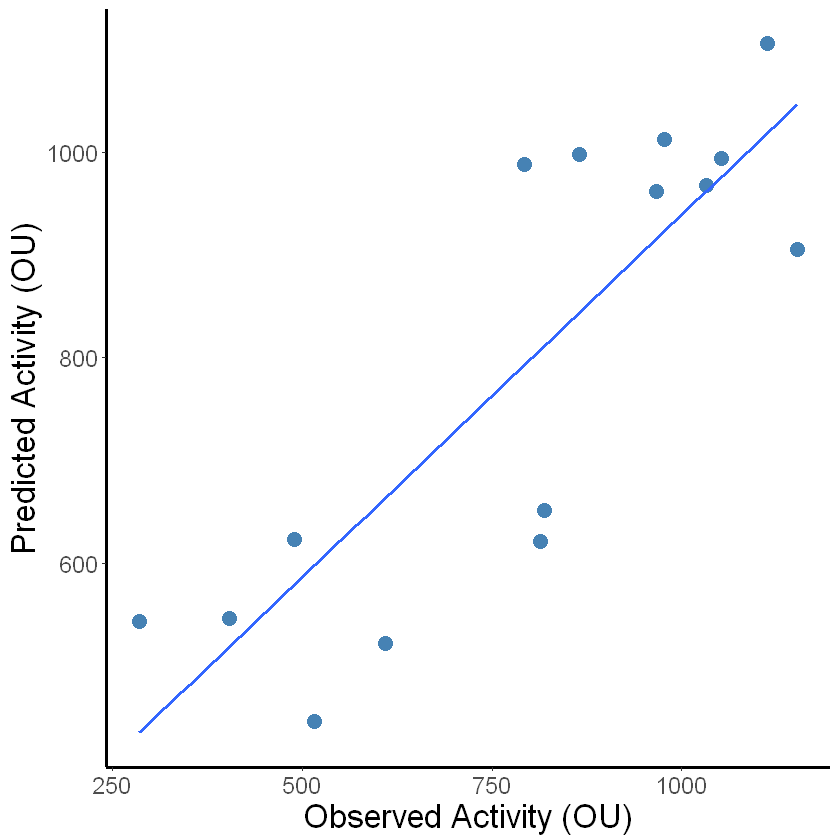

In [9]:
## Plotting the predicted vs observed activity scores
library(ggplot2)
p<- ggplot(apple2,aes(OFA1_Total,PredictedTest)) +
    geom_point(size=4, color = 'steelblue') +
    labs(
        x= "Observed Activity (OU)",
        y= "Predicted Activity (OU)"
        ) +
    geom_smooth(method = 'lm', se=FALSE)
p + theme(
        axis.line = element_line(colour = "black", size = 1),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size=20),
        axis.text = element_text(size=14),
        panel.background= element_rect(fill = 'white'))

In [10]:
## The following is a replication of the exact same normalization parameters on the test data as were performed
## on the training data. Note that test and training data are normalized separately.
datatest<-(test[,7:11])
datatestt = t(datatest)
datatestt

,Beta2 F3,Beta6 F3,Beta7 F3,Beta8 F3,Beta9 F3,Control3 F3,Control5 F3,Control6 F3,Control8 F3,Control1 F1,Control5 F1,Control6 F1
OFA1_Total,834.54000,2960.56000,734.77000,1022.69000,1068.45000,771.00000,107.89000,1057.12000,1222.63000,1532.92000,565.06000,306.07000
GARNL3_Cq,31.37724,30.95729,30.74635,30.24042,31.65914,31.43504,31.08692,31.08975,31.28855,32.78000,32.06000,31.81000
GABRA3_Cq,25.89241,26.19794,25.15020,24.99355,25.97440,26.00098,23.48301,26.17485,25.54845,25.51303,25.92041,25.67471
NRIP3_Cq,25.87231,26.35118,26.83915,25.52418,27.16957,26.73763,24.97162,26.12444,26.18300,27.47073,26.57137,26.59943
B3GALT2_Cq,26.03000,25.50000,25.64000,24.51000,25.73000,25.15000,24.36000,26.03000,25.88000,25.61000,26.00000,25.24000


In [11]:
colnames(datatestt)

[1] "Beta2 F3"    "Beta6 F3"    "Beta7 F3"    "Beta8 F3"    "Beta9 F3"   
 [6] "Control3 F3" "Control5 F3" "Control6 F3" "Control8 F3" "Control1 F1"
[11] "Control5 F1" "Control6 F1"

Warning message in validityMethod(object):
"'counts' contains non-integer numbers"Warning message in RUVr(counts, cIdx, k, residuals, center, round, epsilon, tolerance, :
"It seems the count matrix is already log transformed.
Skipping log transformation.
If not, please fix the matrix.
The count matrix should contain only positive numbers."Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

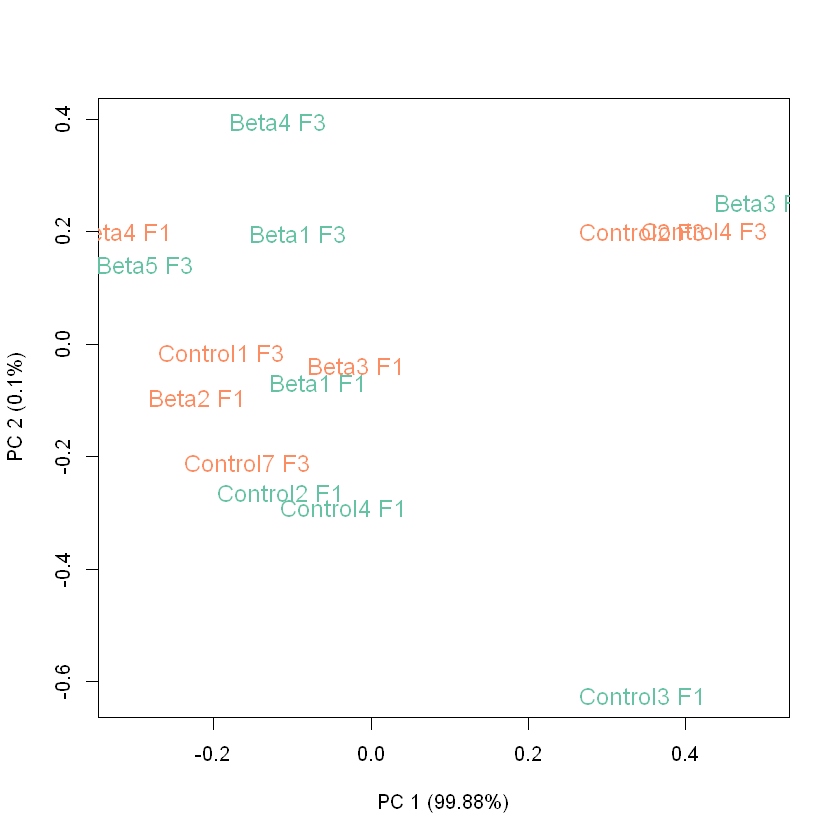

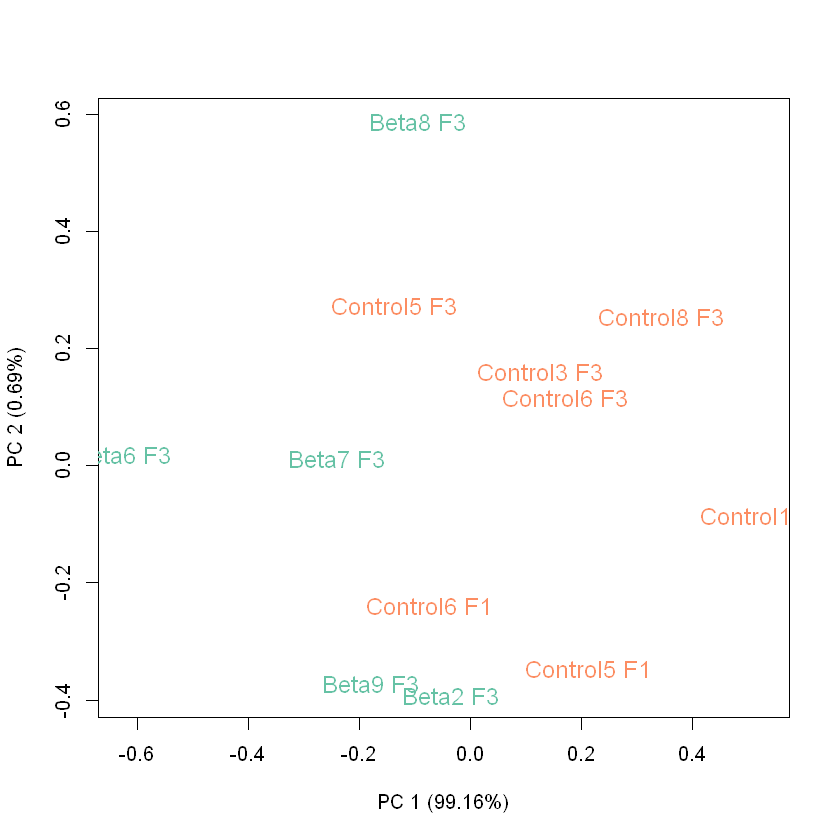

In [13]:
## RUVSeq normalization was applied to the test data as was applied to training data
library(RUVSeq)
xtest <- as.factor(c(1,1,1,1,1,2,2,2,2,2,2,2))
settest <- newSeqExpressionSet(as.matrix(datatestt),
			phenoData = data.frame(xtest, row.names=colnames(datatestt)))
genes <- rownames(datatestt)		
libSizes <- as.vector(colSums(datatestt))	

### RUV visualization 
library(RColorBrewer)
colors <- brewer.pal(3, "Set2")

### Plots
plotPCA(set, col=colors[xtest], cex=1.2)	

### RUVr normalize the data by residuals
designtest<- model.matrix(~xtest, data=pData(settest))
ytest <- DGEList(counts=counts(settest), group=xtest)
ytest <- calcNormFactors(ytest,method="upperquartile")
ytest <- estimateGLMCommonDisp(ytest, designtest)
ytest <- estimateGLMTagwiseDisp(ytest, designtest)
fittest <- glmFit(ytest, designtest)
restest <- residuals(fittest, type="deviance")
set1test<- RUVr(settest, genes, k=3, restest)

plotPCA(set1test, col=colors[xtest], cex=1.2)		


In [14]:
## normalized counts are extracted to be tested in the model
testabc = as.data.frame(normCounts(set1test))
testabct = as.data.frame(t(testabc))
testabct

,OFA1_Total,GARNL3_Cq,GABRA3_Cq,NRIP3_Cq,B3GALT2_Cq
Beta2 F3,1002.4829,31.65049,26.20821,26.86580,25.94565
Beta6 F3,1918.4471,30.74963,25.56374,26.04583,25.10360
Beta7 F3,1255.4657,30.81935,25.12429,26.43280,25.79136
Beta8 F3,1066.8537,30.18588,25.15955,25.55912,24.60671
Beta9 F3,1173.9059,31.51459,26.07318,26.80122,25.91040
Control3 F3,838.5405,31.45232,25.56389,26.10396,25.07298
Control5 F3,1120.1807,31.08403,24.99467,25.95864,25.09612
Control6 F3,798.2396,31.49893,25.29435,26.28984,25.41054
Control8 F3,659.5838,31.36439,25.00656,26.24944,25.47318
Control1 F1,538.2848,32.02862,25.64481,26.70801,25.82987


In [15]:
## Model from training data is used to predict activity from the test data
testabct['PredictedTest'] = predict.lm(model, testabct)

ans = lm(OFA1_Total~ PredictedTest, data = testabct)
summary(ans)


Call:
lm(formula = OFA1_Total ~ PredictedTest, data = testabct)

Residuals:
    Min      1Q  Median      3Q     Max 
-290.14 -202.02  -53.76   69.33  628.85 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -131.7760   472.4775  -0.279   0.7860  
PredictedTest    0.8404     0.3404   2.468   0.0332 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 295.9 on 10 degrees of freedom
Multiple R-squared:  0.3786,	Adjusted R-squared:  0.3165 
F-statistic: 6.093 on 1 and 10 DF,  p-value: 0.03319


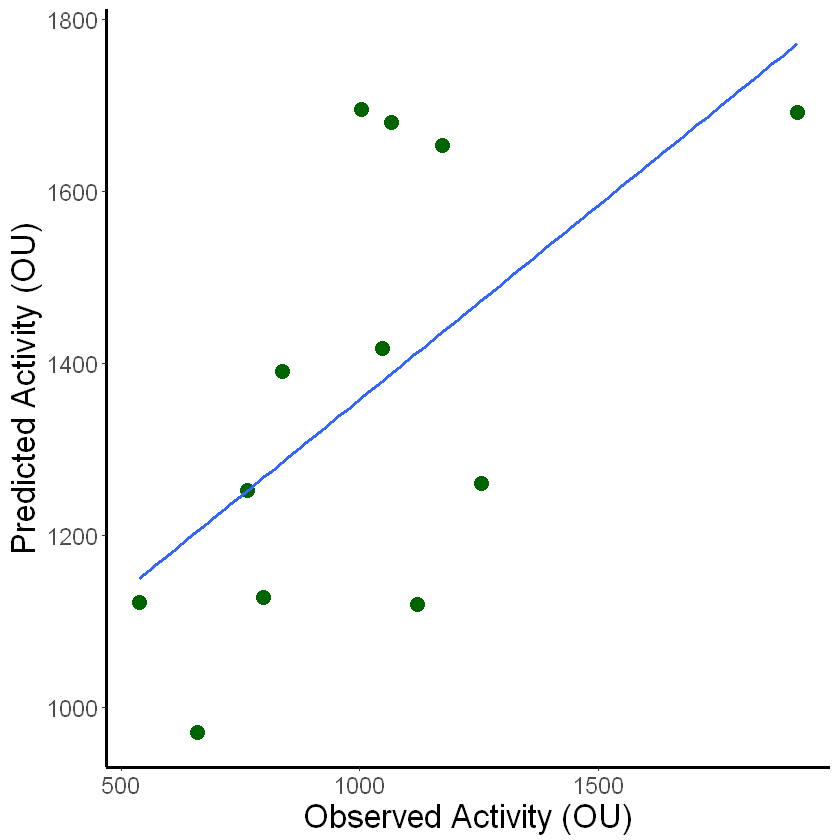

In [16]:
## These data demonstrates that the model generalizes to a novel data set, suggesting that these genes
## may indeed play a role in mediating behavior.

p<- ggplot(testabct,aes(OFA1_Total,PredictedTest)) +
    geom_point(size=4, color = 'darkgreen') +
    labs(
        x= "Observed Activity (OU)",
        y= "Predicted Activity (OU)"
        ) +
    geom_smooth(method = 'lm', se=FALSE)
p + theme(
        axis.line = element_line(colour = "black", size = 1),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size=20),
        axis.text = element_text(size=14),
        panel.background= element_rect(fill = 'white'))